In [1]:
#import all library 

import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
import re

In [2]:
#import dataset 
j=open("Client_data.json")

In [3]:
data=json.load(j)

In [4]:
data

[{'_index': 'complaint-public-v2',
  '_type': 'complaint',
  '_id': '3211475',
  '_score': 0.0,
  '_source': {'tags': None,
   'zip_code': '90301',
   'complaint_id': '3211475',
   'issue': 'Attempts to collect debt not owed',
   'date_received': '2019-04-13T12:00:00-05:00',
   'state': 'CA',
   'consumer_disputed': 'N/A',
   'product': 'Debt collection',
   'company_response': 'Closed with explanation',
   'company': 'JPMORGAN CHASE & CO.',
   'submitted_via': 'Web',
   'date_sent_to_company': '2019-04-13T12:00:00-05:00',
   'company_public_response': None,
   'sub_product': 'Credit card debt',
   'timely': 'Yes',
   'complaint_what_happened': '',
   'sub_issue': 'Debt is not yours',
   'consumer_consent_provided': 'Consent not provided'}},
 {'_index': 'complaint-public-v2',
  '_type': 'complaint',
  '_id': '3229299',
  '_score': 0.0,
  '_source': {'tags': 'Servicemember',
   'zip_code': '319XX',
   'complaint_id': '3229299',
   'issue': 'Written notification about debt',
   'date_rec

In [5]:
df=pd.json_normalize(data)

In [6]:
df

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78308,complaint-public-v2,complaint,3105617,0.0,None,08857,3105617,Closing an account,2018-12-20T12:00:00-05:00,NJ,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-21T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,N/A,Credit card or prepaid card,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


In [7]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [8]:
df.shape

(78313, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [10]:
df.dtypes

_index                                object
_type                                 object
_id                                   object
_score                               float64
_source.tags                          object
_source.zip_code                      object
_source.complaint_id                  object
_source.issue                         object
_source.date_received                 object
_source.state                         object
_source.consumer_disputed             object
_source.product                       object
_source.company_response              object
_source.company                       object
_source.submitted_via                 object
_source.date_sent_to_company          object
_source.company_public_response       object
_source.sub_product                   object
_source.timely                        object
_source.complaint_what_happened       object
_source.sub_issue                     object
_source.consumer_consent_provided     object
dtype: obj

In [11]:
df.describe

<bound method NDFrame.describe of                     _index      _type      _id  _score   _source.tags  \
0      complaint-public-v2  complaint  3211475     0.0           None   
1      complaint-public-v2  complaint  3229299     0.0  Servicemember   
2      complaint-public-v2  complaint  3199379     0.0           None   
3      complaint-public-v2  complaint  2673060     0.0           None   
4      complaint-public-v2  complaint  3203545     0.0           None   
...                    ...        ...      ...     ...            ...   
78308  complaint-public-v2  complaint  3105617     0.0           None   
78309  complaint-public-v2  complaint  3091984     0.0           None   
78310  complaint-public-v2  complaint  3133355     0.0           None   
78311  complaint-public-v2  complaint  3110963     0.0           None   
78312  complaint-public-v2  complaint  2001189     0.0           None   

      _source.zip_code _source.complaint_id  \
0                90301              321147

In [12]:
# creating new dataset using required columns
data = df[['_source.sub_product','_source.complaint_what_happened','_source.sub_issue']]
data.columns = ['sub_product','complaint_what_happened','sub_issue']
data.head(10)

,sub_product,complaint_what_happened,sub_issue
0,Credit card debt,,Debt is not yours
1,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt
2,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card
3,Conventional home mortgage,,None
4,General-purpose credit card or charge card,,Charged too much interest
5,Checking account,,Problem using a debit or ATM card
6,Checking account,,Problem using a debit or ATM card
7,Conventional home mortgage,,None
8,Checking account,,Company closed your account
9,Checking account,,Cashing a check


In [13]:
#checking how many rows are blank
len(data[data['complaint_what_happened'] == ""])

57241

In [14]:
data['complaint_what_happened'].shape

(78313,)

In [18]:
data['complaint_what_happened'].replace('',np.nan,inplace=True)


In [19]:
data.dropna(subset=['complaint_what_happened'],inplace=True)


In [20]:
data['complaint_what_happened'].shape


(21072,)

In [21]:
#Text Preprocessing
# removing stopwords 

stop_words = set(stopwords.words('English'))

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

data['sub_product'] = data['sub_product'].apply(lambda text: cleaning_stopwords(text))
data['complaint_what_happened'] = data['complaint_what_happened'].apply(lambda text: cleaning_stopwords(text))
data['sub_issue'] = data['sub_issue'].apply(lambda text: cleaning_stopwords(text))
data.head()

,sub_product,complaint_what_happened,sub_issue
1,Credit card debt,Good morning name XXXX XXXX I appreciate could...,Didn't receive enough information verify debt
2,General-purpose credit card charge card,I upgraded XXXX XXXX card XX/XX/2018 told agen...,Problem rewards credit card
10,Other personal consumer report,"Chase Card reported XX/XX/2019. However, fraud...",Information belongs someone else
11,Credit reporting,"On XX/XX/2018, trying book XXXX XXXX ticket, I...",Information belongs someone else
14,Checking account,grand son give check {$1600.00} deposit chase ...,Funds handled disbursed instructed


In [22]:
# removing punctuations


reg_punc = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()


data['complaint_what_happened'] = data['complaint_what_happened'].apply(lambda text: remove_punctuation(text,reg_punc))
data

,sub_product,complaint_what_happened,sub_issue
1,Credit card debt,Good morning name XXXX XXXX I appreciate could...,Didn't receive enough information verify debt
2,General-purpose credit card charge card,I upgraded XXXX XXXX card XX XX 2018 told agen...,Problem rewards credit card
10,Other personal consumer report,Chase Card reported XX XX 2019 However fraud...,Information belongs someone else
11,Credit reporting,On XX XX 2018 trying book XXXX XXXX ticket I...,Information belongs someone else
14,Checking account,grand son give check 1600 00 deposit chase ...,Funds handled disbursed instructed
...,...,...,...
78303,General-purpose credit card charge card,After Chase Card customer well decade offered...,Didn't receive advertised promotional terms
78309,General-purpose credit card charge card,On Wednesday XX XX XXXX I called Chas XXXX X...,Other problem
78310,Checking account,I familiar XXXX pay understand great risk prov...,Transaction authorized
78311,General-purpose credit card charge card,I flawless credit 30 yrs I ve Chase credit ca...,Problem balance transfer


In [23]:
#removing numeric data


def cleaning_numeric(text):
    return re.sub(r'[0-9]*','',text)
data['complaint_what_happened'] = data['complaint_what_happened'].apply(lambda text: cleaning_numeric(text))


In [24]:
data

,sub_product,complaint_what_happened,sub_issue
1,Credit card debt,Good morning name XXXX XXXX I appreciate could...,Didn't receive enough information verify debt
2,General-purpose credit card charge card,I upgraded XXXX XXXX card XX XX told agent up...,Problem rewards credit card
10,Other personal consumer report,Chase Card reported XX XX However fraudulen...,Information belongs someone else
11,Credit reporting,On XX XX trying book XXXX XXXX ticket I cam...,Information belongs someone else
14,Checking account,grand son give check deposit chase accoun...,Funds handled disbursed instructed
...,...,...,...
78303,General-purpose credit card charge card,After Chase Card customer well decade offered...,Didn't receive advertised promotional terms
78309,General-purpose credit card charge card,On Wednesday XX XX XXXX I called Chas XXXX X...,Other problem
78310,Checking account,I familiar XXXX pay understand great risk prov...,Transaction authorized
78311,General-purpose credit card charge card,I flawless credit yrs I ve Chase credit card...,Problem balance transfer


In [26]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

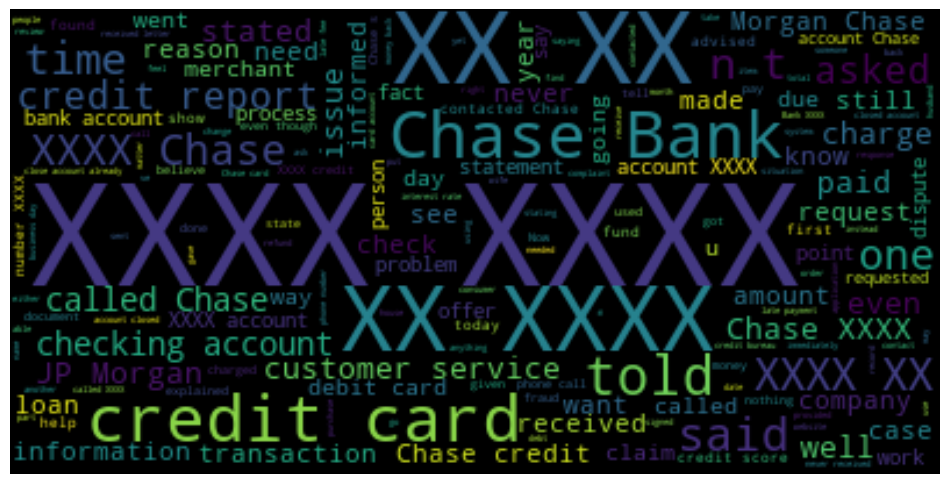

In [27]:
#now lets explore some EDA in dataset
# creating word cloud



text = " ".join(review for review in data.complaint_what_happened.astype(str))
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
#coming to the feature extraction part


In [28]:
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(data.complaint_what_happened)

In [29]:
data

,sub_product,complaint_what_happened,sub_issue
1,Credit card debt,Good morning name XXXX XXXX I appreciate could...,Didn't receive enough information verify debt
2,General-purpose credit card charge card,I upgraded XXXX XXXX card XX XX told agent up...,Problem rewards credit card
10,Other personal consumer report,Chase Card reported XX XX However fraudulen...,Information belongs someone else
11,Credit reporting,On XX XX trying book XXXX XXXX ticket I cam...,Information belongs someone else
14,Checking account,grand son give check deposit chase accoun...,Funds handled disbursed instructed
...,...,...,...
78303,General-purpose credit card charge card,After Chase Card customer well decade offered...,Didn't receive advertised promotional terms
78309,General-purpose credit card charge card,On Wednesday XX XX XXXX I called Chas XXXX X...,Other problem
78310,Checking account,I familiar XXXX pay understand great risk prov...,Transaction authorized
78311,General-purpose credit card charge card,I flawless credit yrs I ve Chase credit card...,Problem balance transfer


In [30]:
vocab = np.array(vectorizer.get_feature_names())


In [31]:
vocab.shape

(27981,)

In [32]:
#Non-Negative Matrix Factorization (NMF).

In [33]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(features)

NMF(n_components=5, random_state=42)

# Topic Modelling using NMF

In [34]:
topic=10
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1] 

In [40]:
# lets see n top word in display
n_top_words = 15


def top_words(n_top_words, vocab, nmf):
    for i, topic_vec in enumerate(nmf.components_):
        print(i, end=' ')
        
        
    for f in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(vocab[f], end=' ')
    print()
        


In [41]:
top_words(n_top_words, vocab, nmf)

0 1 2 3 4 loan payment mortgage payments chase late interest modification home pay paid we due rate would 


In [46]:
def topic_table(n_top_words, vocab, nmf):
    topics = {}
    
    for i, topic_vec in enumerate(nmf.components_):
        topic_descr = ''
        
        for f in topic_vec.argsort()[-1:-n_top_words-1:-1]:
            topic_descr = topic_descr + vocab[f] + " "
        topics[i] = topic_descr
        
        
    return pd.DataFrame({'Top_Topic_Terms': topics})


In [50]:
# Top 5 (level topic)
topic_df = topic_table(5, vocab, nmf)
topic_df

,Top_Topic_Terms
0,xxxx chase bank number the
1,account bank chase check money
2,xx on chase dispute received
3,credit card report chase cards
4,loan payment mortgage payments chase


In [51]:
# label topic 
topic_df['Label'] = ['Banking services', 'loans', 'Fraudalent reporting', 'Card', 'others']

In [52]:
document_weights = nmf.transform(vectorizer.transform(data['complaint_what_happened']))
document_weights

array([[0.0424251 , 0.0233258 , 0.        , 0.00915581, 0.01573678],
       [0.03228472, 0.00662107, 0.0612027 , 0.00649393, 0.        ],
       [0.        , 0.        , 0.03267781, 0.04115411, 0.        ],
       ...,
       [0.01762098, 0.02700788, 0.00037146, 0.01377747, 0.00643825],
       [0.00949793, 0.01182467, 0.03253063, 0.03651676, 0.05324691],
       [0.00381552, 0.01944072, 0.0002049 , 0.02370744, 0.0476591 ]])

In [55]:
data["Topic_id"]=document_weights.argmax(axis=1)

In [56]:
# lets join original data with label


data = pd.merge(data, topic_df, left_on='Topic_id', right_index=True, how='left')

In [57]:
data

,sub_product,complaint_what_happened,sub_issue,Topic_id,Top_Topic_Terms,Label
1,Credit card debt,Good morning name XXXX XXXX I appreciate could...,Didn't receive enough information verify debt,0,xxxx chase bank number the,Banking services
2,General-purpose credit card charge card,I upgraded XXXX XXXX card XX XX told agent up...,Problem rewards credit card,2,xx on chase dispute received,Fraudalent reporting
10,Other personal consumer report,Chase Card reported XX XX However fraudulen...,Information belongs someone else,3,credit card report chase cards,Card
11,Credit reporting,On XX XX trying book XXXX XXXX ticket I cam...,Information belongs someone else,3,credit card report chase cards,Card
14,Checking account,grand son give check deposit chase accoun...,Funds handled disbursed instructed,1,account bank chase check money,loans
...,...,...,...,...,...,...
78303,General-purpose credit card charge card,After Chase Card customer well decade offered...,Didn't receive advertised promotional terms,3,credit card report chase cards,Card
78309,General-purpose credit card charge card,On Wednesday XX XX XXXX I called Chas XXXX X...,Other problem,1,account bank chase check money,loans
78310,Checking account,I familiar XXXX pay understand great risk prov...,Transaction authorized,1,account bank chase check money,loans
78311,General-purpose credit card charge card,I flawless credit yrs I ve Chase credit card...,Problem balance transfer,4,loan payment mortgage payments chase,others


# model tuning with Naive bayes algorithm

In [58]:
X = data.complaint_what_happened
y = data.Label

In [59]:
X

1        Good morning name XXXX XXXX I appreciate could...
2        I upgraded XXXX XXXX card XX XX  told agent up...
10       Chase Card reported XX XX   However  fraudulen...
11       On XX XX   trying book XXXX XXXX ticket  I cam...
14       grand son give check      deposit chase accoun...
                               ...                        
78303    After Chase Card customer well decade  offered...
78309    On Wednesday  XX XX XXXX I called Chas  XXXX X...
78310    I familiar XXXX pay understand great risk prov...
78311    I flawless credit  yrs  I ve Chase credit card...
78312    Roughly   years ago I closed accounts JP Morga...
Name: complaint_what_happened, Length: 21072, dtype: object

In [60]:
y

1            Banking services
2        Fraudalent reporting
10                       Card
11                       Card
14                      loans
                 ...         
78303                    Card
78309                   loans
78310                   loans
78311                  others
78312                  others
Name: Label, Length: 21072, dtype: object

In [61]:
X.shape,y.shape

((21072,), (21072,))

In [64]:
#splitting dataset into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.05,random_state=24143111)

In [65]:
#Using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(x_train)

TfidfVectorizer()

In [66]:
x_train = vec.transform(x_train)
x_test = vec.transform(x_test)

In [67]:
#implementing models using MultinomialNB classification
multi_nb = MultinomialNB()
multi_nb.fit(x_train,y_train)


MultinomialNB()

In [68]:
#predict model
y_pred = multi_nb.predict(x_test)
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

    Banking services       0.55      0.41      0.47       223
                Card       0.70      0.66      0.68       223
Fraudalent reporting       1.00      0.01      0.02       120
               loans       0.55      0.94      0.69       290
              others       0.78      0.70      0.73       198

            accuracy                           0.62      1054
           macro avg       0.72      0.55      0.52      1054
        weighted avg       0.68      0.62      0.58      1054

